# Computer Vision with OpenCV

Computer vision is a field of computer science that focuses on enabling computers to identify and understand objects and people in images and videos. It also enables computers and systems to derive meaningful information from digital images, videos and other visual inputs — and take actions or make recommendations based on that information.


OpenCV is one of the most popular open-source software library for computer vision and machine learning. The OpenCV full form is Open Source Computer Vision. 

Few of the applications of this package are reading an image, extracting the RGB values of a pixel, extracting the region of Interest (ROI), resizing the image, rotating the image, drawing a rectangle, displaying text etc.


We start by installing the opencv package. OpenCV can be directly downloaded and installed with the use of pip (package manager). To install OpenCV, just go to the command-line and type the following command:


In [1]:
!pip install opencv-python 

To check if OpenCV is correctly installed, just run the following commands to perform a version check:

In [2]:
import cv2
print(cv2.__version__)

4.7.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt
import cv2

!pip install pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Users\Prachi\AppData\Local\Tesseract-OCR\tesseract.exe"
import pytesseract
from pytesseract import image_to_string

In [4]:
%matplotlib inline

We start by reading an image, the imread function is used to read images. When working with OpenCV Python, images are stored in numpy ndarray. To get the image shape or size we use the shape property of array as ndarray.shape to get the dimensions of the image. Then, we can use index on the dimensions variable to get width, height and number of channels for each pixel. In the shape function the first element i.e shape[0] is the height of the image, the second element shape[1] is the width of the image and the third element shape[2] is the number of channels in the image i.e. if the image is RGB or grayscale.

In [5]:
imagePath = './input/INC.jpg'
img = cv2.imread(imagePath) #Reading the image


The imwrite function saves an image in a storage device and the file extension defines the image format. 

In [6]:
status = cv2.imwrite(r'./output/outputINC.jpg', img) #Writing the image to the output folder with the path and filename mentioned
print("Image written sucess? : ", status)  


Image written sucess? :  True


And finally, to display the image, imshow() is used which opens a new window and display the image mentioned in the function. Please note, whenever an image opens in a new window the opened image needs to be closed to proceed further with the code.

In [7]:
cv2.imshow('Indian National Cricket Team', img) # display the image in a new window
cv2.waitKey()

#The opened image needs to be closed to proceed further with the code.
print('Shape of the image is : ',img.shape)


Shape of the image is :  (1080, 1920, 3)



Next we will upscale/resize our image, the resize function will upscale or change the dimension of our image to the percentage or dimensions given. one interesting thing about resizing is if we change upscale or downscale an image the height to width ratio is preserved, however, if we change only one i.e. either height or width the height or width ratio is not maintained.


In [8]:
cv2.destroyAllWindows()
#Upscaling image.
print('Original Dimensions : ',img.shape)

scale_percent = 150 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

cv2.imshow("Resized image", resized)
cv2.waitKey()


Original Dimensions :  (1080, 1920, 3)
Resized Dimensions :  (1620, 2880, 3)


-1

In [9]:
#Upscaling image.
print('Original Dimensions : ',img.shape)
 
width = 440
height = img.shape[0] # keep original height
dim = (width, height)
 
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (1080, 1920, 3)
Resized Dimensions :  (1080, 440, 3)


Here in the second example, we only changed the width of the image and that did not affect the height of the image.

The cvtcolor function helps to convert the image from one color space to another.
The different options for color space in detail can be found at

https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html



(-0.5, 1919.5, 1079.5, -0.5)

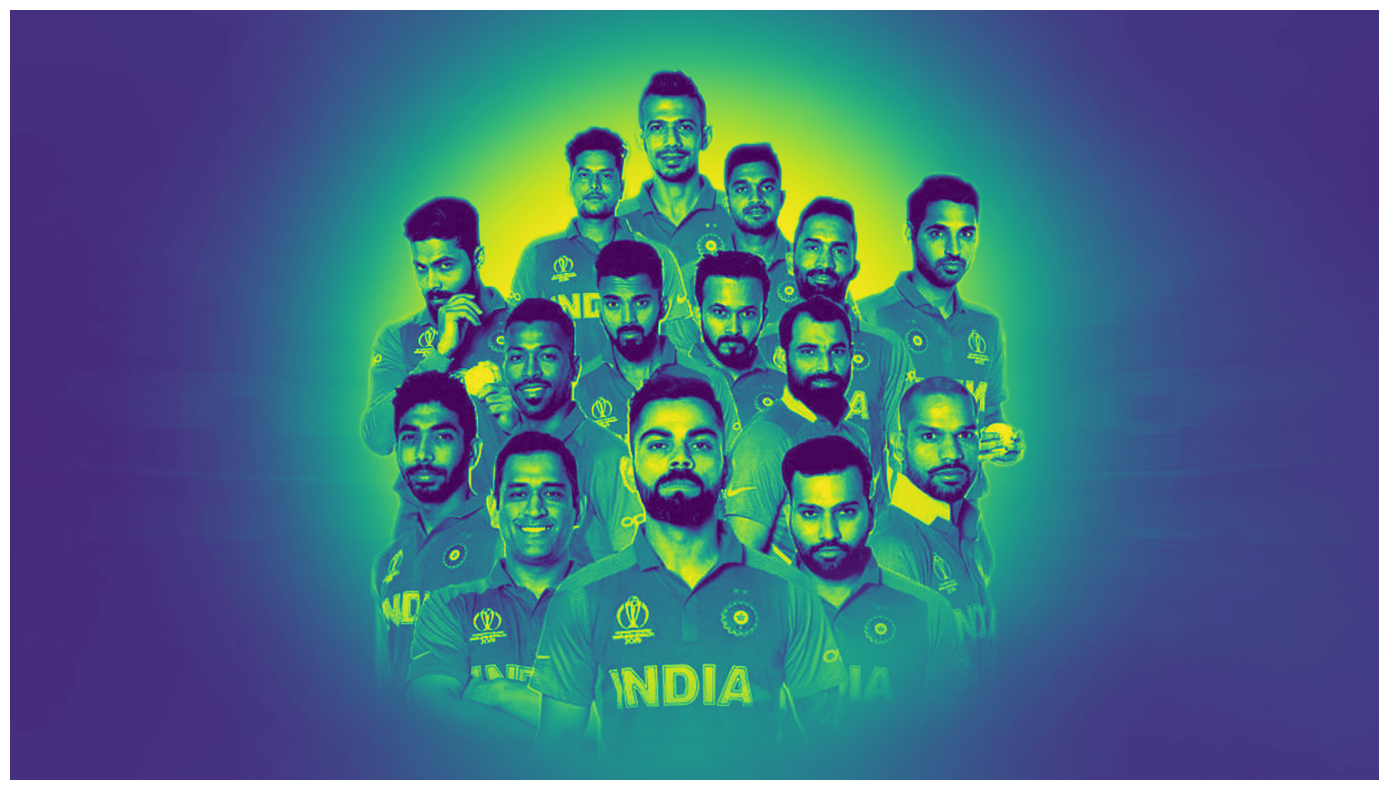

In [10]:

grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#cv2.imshow('Gray image', grayImage)

plt.figure(figsize=(20,10))
plt.imshow(grayImage)
plt.axis('off')



Other than above mentioned function there are multiple other functions to add images on over another with simple add function, we can blur or remove background from the image and various other things.

However, we move next to see how opencv can be used to detect objects in an image. Image features such as points, edges, or patterns are used to identify an object in an image. A cascade classifier uses these visual cues as features to determine if an object is in the image this is also know as Haar-feature based cascade classification, in which we first convert the image to grayscale as gray channel is easy to process and it contains only 1-channel of black-white, which makes it easier to capture and work on the darker and lighter regions and then a small square of size b*b is ran through our image capturing all squares (lighter and darker) of the image to sum up the pixel values of both regions(lighter and darker) and then comparing them to identify multiple features of the image.

OpenCV already contains many pre-trained classifiers for face, eyes, smile etc. these classifiers are defined in XML files which are stored in opencv/data/haarcascades/ folder. To detect face in our above image we start by loading the required XML classifiers like in this case its haarcascade_frontalface_default.xml, which is pretrained to detect face based on different feature recognition like the size and location of facial features like the bridge of the nose ( nose bridge brighter than the eye region), eyes (eye region begin darker than the upper-cheek region) and so on. We already have our image in grayscale.


In [11]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


detectMultiScale() detects objects of different sizes in the input image and returns rectangles positioned on the faces. it takes multiple parameters as input, but here we are providing it with our gray scale image, the scale factor which is how much the image size is reduced at each image scale. minNeighbors that is how many neighbors each candidate rectangle should have to retain it, minSize which is minimum possible object size. Objects smaller than the mentioned minSize are ignored. 

The output of the detectMultiScale() is stored in the face variable to understand what it stores, we see that the type of the face variable is numpy array, and it stores the coordinates as well as the height and width of the object detected, and the shape function shows that there are 15 objects/faces detected.


In [12]:
face = face_classifier.detectMultiScale(
    grayImage, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
print(type(face))
print(face)
print(face.shape)
print("Number of faces detected: " + str(face.shape[0]))


<class 'numpy.ndarray'>
[[ 872  120  114  114]
 [ 774  194   96   96]
 [1089  290  110  110]
 [ 543  320  109  109]
 [ 677  440  113  113]
 [1085  437  110  110]
 [ 673  629  128  128]
 [1078  652  141  141]
 [ 810  366  115  115]
 [ 954  379  118  118]
 [ 513  543  141  141]
 [1248  546  136  136]
 [ 856  542  165  165]
 [ 997  212   96   96]
 [1265  269  115  115]]
(15, 4)
Number of faces detected: 15


The below for loop will only draw a rectangle on the size mentioned in the face array, and on displaying the image and counting the faces we see there are indeed 15 faces in our image.

In [13]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1919.5, 1079.5, -0.5)

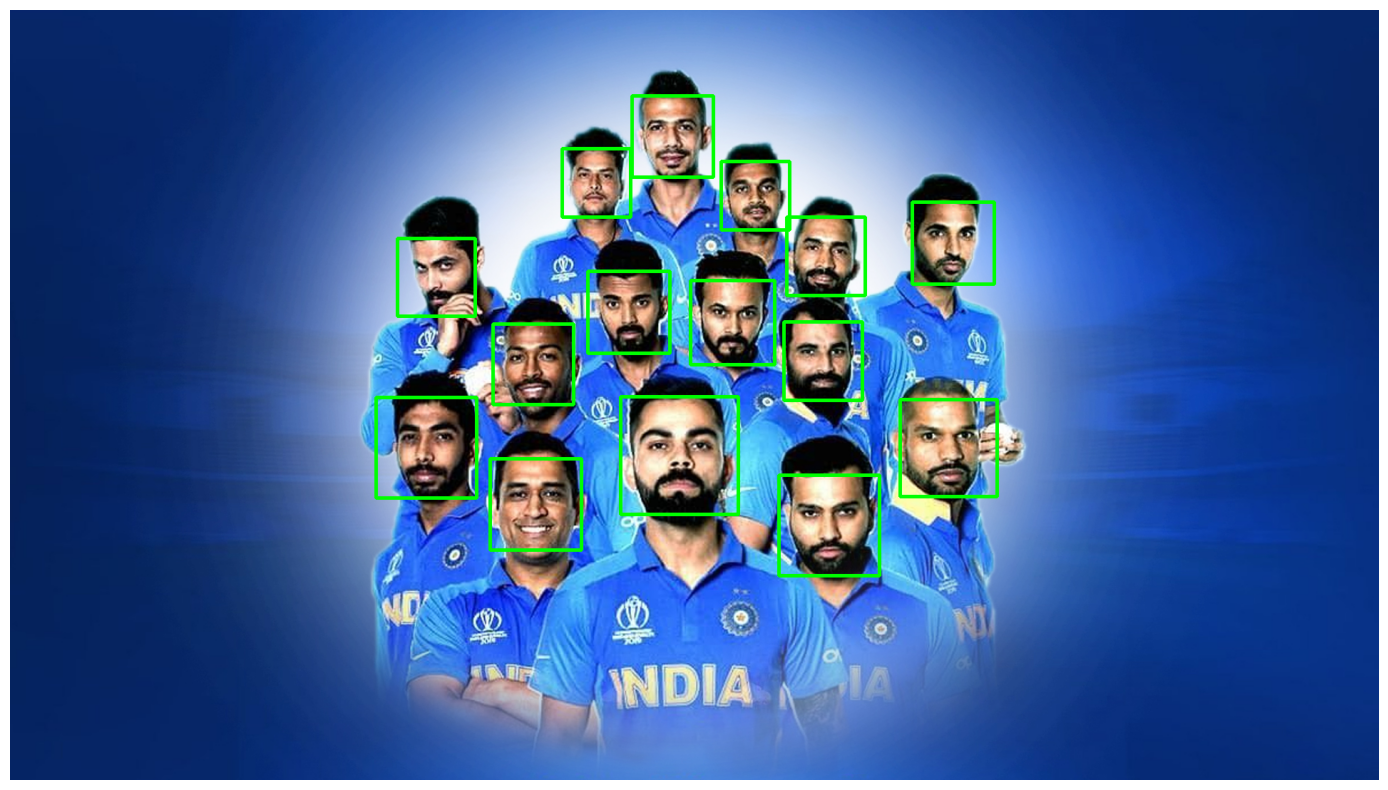

In [15]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

As haarcascade_frontalface_default.xml is pretrained to detect faces, there are many other pretrained model to detect other objects like cars, bus and an important one is haarcascade_russian_plate_number.xml that detects a license plate.

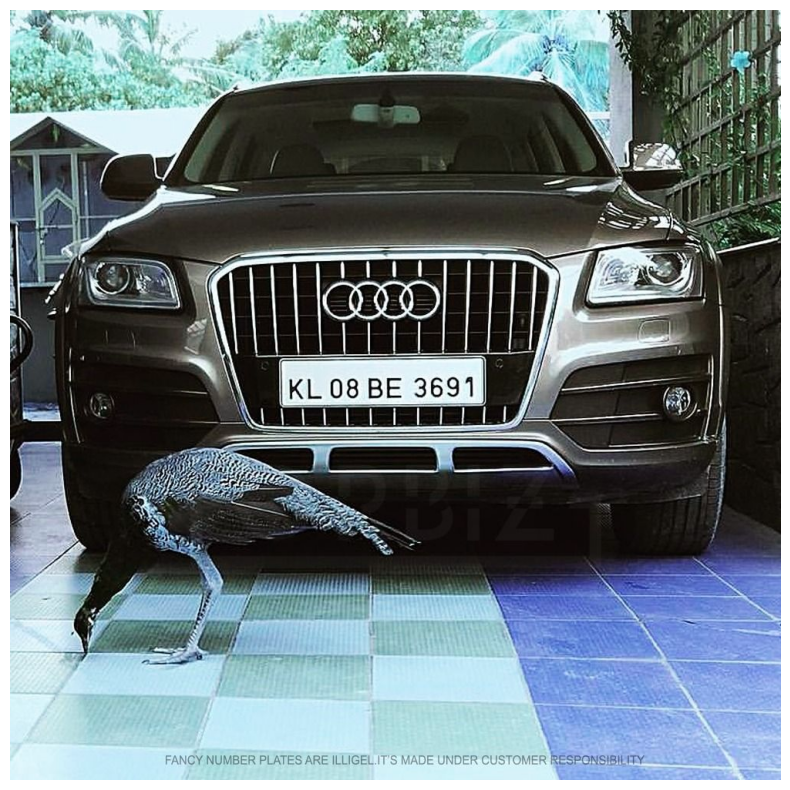

In [16]:
car_imagePath = './input/Car.jpg'
car_img = cv2.imread(car_imagePath)
car_img.shape


plt.figure(figsize=(20,10))
plt.imshow(car_img)
plt.axis('off')

gray = cv2.cvtColor(car_img, cv2.COLOR_BGR2GRAY)


Number of detected license plates: 1


(-0.5, 289.5, 95.5, -0.5)

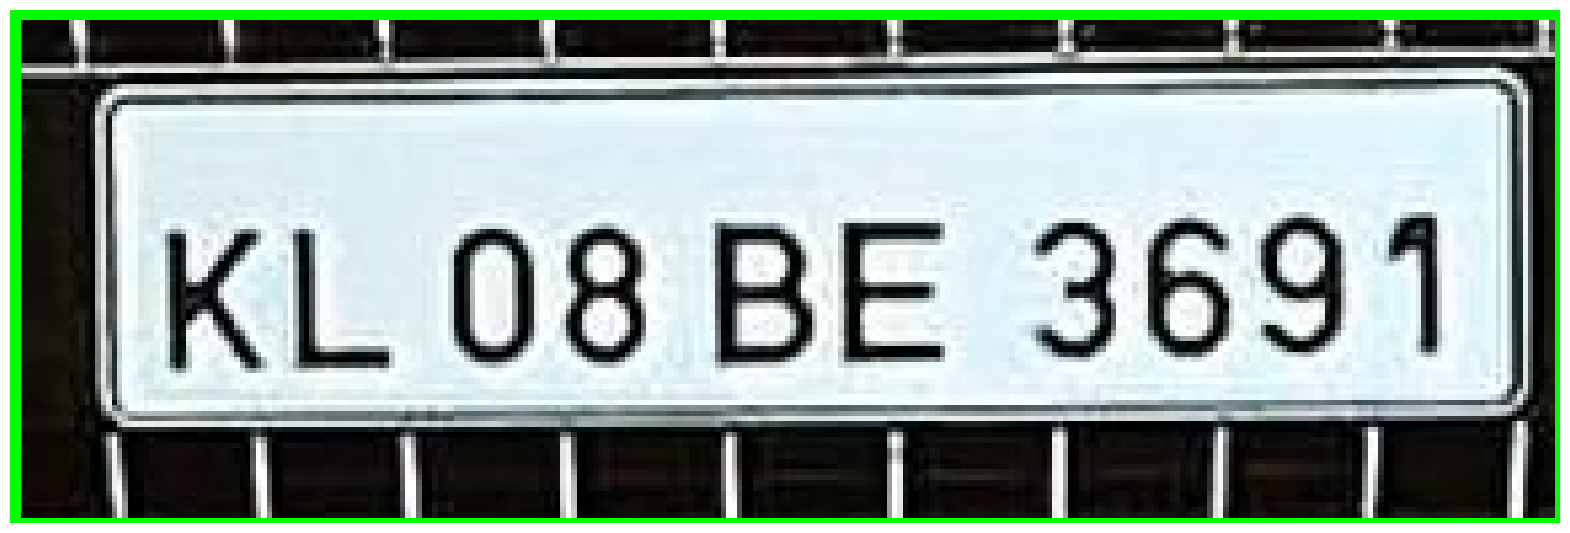

In [17]:
cascade =  cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

# Detect license number plates
licence_plt = cascade.detectMultiScale(gray, 1.2, 5)
print('Number of detected license plates:', len(licence_plt))


# loop over all plates
for (x,y,w,h) in licence_plt:
     
   # draw bounding rectangle around the license number plate
    cv2.rectangle(car_img, (x,y), (x+w, y+h), (0,255,0), 2)
    gray_plates = gray[y:y+h, x:x+w]
    color_plates = car_img[y:y+h, x:x+w]
   
   # save number plate detected
    cv2.imwrite(r'./output/Numberplate.jpg', gray_plates)
    #cv2.imshow('Number Plate', gray_plates)
    #cv2.imshow('Number Plate Image', car_img)
    cv2.waitKey(0)

    
plt.figure(figsize=(20,10))
plt.imshow(color_plates)
plt.axis('off')



Now that we have the image of only the license plate, we can read the image to text using optical character recognition (OCR) library Pytesseract. To understand Pytesseract, we first need to understand a bit about Tesseract, which is an open-source OCR Engine that extracts printed or written text from images. It was originally developed by Hewlett-Packard, and development was later taken over by Google. This is why it is now known as “Google Tesseract OCR”. 

Pytesseract is not only OCR in Python, open source software, or a Python library, but also serves as a wrapper for Google’s Tesseract OCR Engine. What it does is wrap Python code around Tesseract OCR, ensuring compatibility and ability to operate with different software structures. It can read all image types including jpeg, png, gif, bmp, tiff, and others. For now, we are only using its image_to_string function to convert our license plate to text.

The easiest way to install pytesseract is using pip.

(P.S. All the package installations and imports should be done at the start of the notebook for best practices.)


In [18]:
!pip install pytesseract


Once pytesseract installed, we import the pytesseract package and image_to_string module from pytesseract package. For using the image_to_string module we also need to install Google Tessearact OCR Engine, I found mine from the GitHub link
https://github.com/UB-Mannheim/tesseract/wiki

Once the Google Tessearact OCR Engine is downloaded and installed we need to specifies the path for the Tesseract engine executable file we installed earlier. You need to update your path accordingly if you installed Tesseract OCR in a different location.

In [19]:

import pytesseract
from pytesseract import image_to_string

pytesseract.pytesseract.tesseract_cmd = r"C:\Users\Prachi\AppData\Local\Tesseract-OCR\tesseract.exe"


In [20]:
text = pytesseract.image_to_string(color_plates,lang='eng')
print("Licence plate number is :", '\033[1m' + text + '\033[0m')


Licence plate number is : KL 08 BE 3691



Next moving to image modification using Opencv. Opencv uses Kernel which is nothing but a matrix in the image manipulation process where each element value causes range of effects in the image, to sharpen an image.

https://en.wikipedia.org/wiki/Kernel_(image_processing)

By matrix is created to increase the pixel intensity and make them element more prominent. In our example below, our actual image is slightly blur, we create a kernel matrix with -1 around the edges and 9 in the center so that it detects the edges and increased the intensity of the center part. Next we use the filter2d() from opencv to combine our image and the kernel matrix to modify our image.

In the later example we can see that how decreasing just the center number affects our entire image.

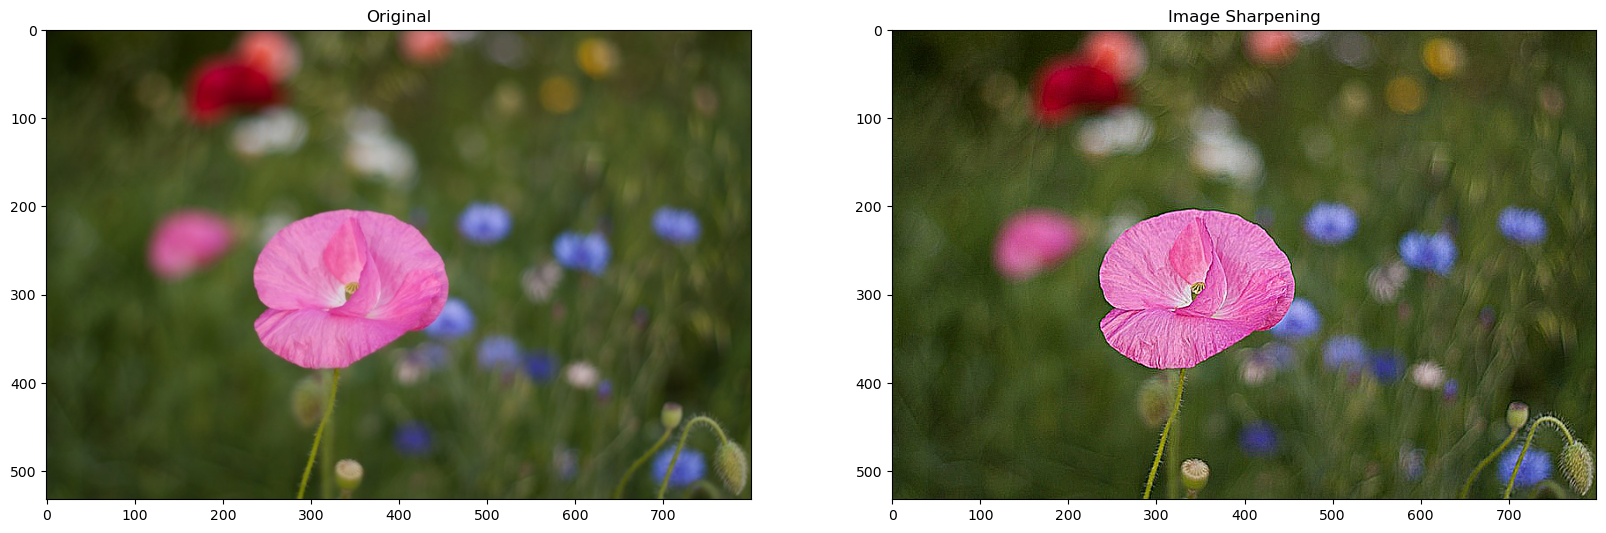

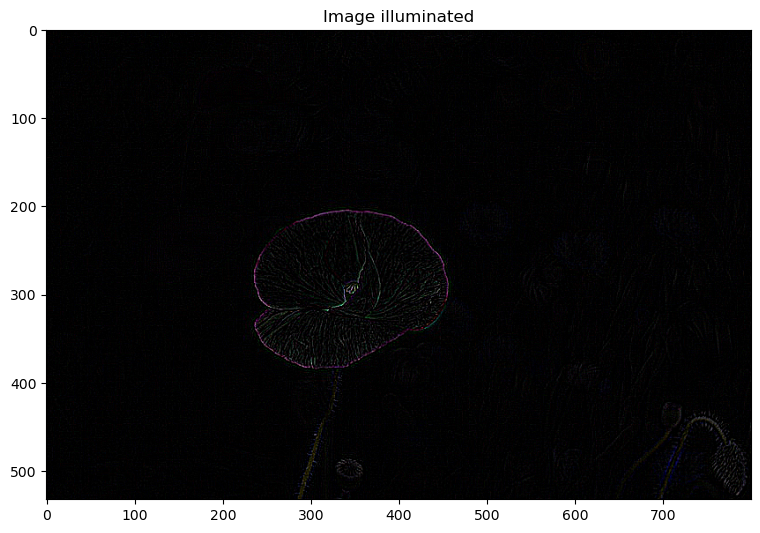

In [21]:
blur_imagePath = './input/Poppy.jpg'
blur_img = cv2.imread(blur_imagePath)

#image = cv2.imread('/kaggle/input/opencv-samples-images/data/building.jpg')
image = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpen = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpen)



plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)
plt.show()

kernel_sharpen = np.array([[-1,-1,-1], 
                              [-1,8,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
illuminate = cv2.filter2D(image, -1, kernel_sharpen)


plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 2)
plt.title("Image illuminated")
plt.imshow(illuminate)
plt.show()


There are other several computer vision python libraries and frameworks for developers to help them automate tasks, which includes detections and visualisations. 

Imutils <br>
Imutils is a computer vision package that includes a series of OpenCV + convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonisation, displaying Matplotlib images, sorting contours, detecting edges, among others quite easy.

Keras <br>
Written in Python, Keras is a high-level neural networks library that is capable of running on top of either TensorFlow or Theano. The library was developed with a focus on enabling fast experimentation.

PyTorchCV <br>
PyTorchCV is a PyTorch-based framework for computer vision tasks. The framework is a  collection of image classification, segmentation, detection, and pose estimation models. 

Scikit-Image <br>
Scikit-Image is a popular and open-source Python library that includes a collection of algorithms for image processing. It is basically an image processing toolbox for SciPy. The library is built on scipy.ndimage to provide a versatile set of image processing routines in Python language. This image processing library provides a well-documented API in the Python programming language and implements algorithms and utilities for use in research, education and industry applications.

## References

https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html <br>
https://docs.opencv.org/4.x/ <br>
https://www.mygreatlearning.com/blog/opencv-tutorial-in-python/ <br>
https://nanonets.com/blog/ocr-with-tesseract/